In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 머신러닝
## 지도학습(supervised learning)
###### 분류분석(classify) => 비연속적 값 예측
###### 회귀분석 =>(linear regression) => 연속적인 값 예측
## 비지도학습(unsupervised learning)
###### 군집분석(clustering)


## 독립변수와 종속변수
###### 독립변수: 예측하기 위해서 사용되는 데이터 x
###### 종속변수: 예측의 대상이 되는 데이터       y

## ML의 단계 
###### 0. 데이터 전처리
###### 1. x 데이터와 y데이터 나누기
###### 2. train 데이터와 test 데이터 나누기
###### 3. 알고리즘 가져오기
###### 4. 학습하기 -> 모델 도출
###### 5. 모델로 예측하기
###### 6. 모델 평가하기

#### over fitting과 under fitting
###### over fitting: train data만 잘 예측하는 모델. 과다학습 된 모델
###### under fitting: train이 잘 안된 모델 예측능력 미달

## Confusion matrix
<table> 
    <tr>
    <td>True Positive</td>
    <td>False Positive</td>
    </tr>
    <tr>
    <td>False Negative </td>
    <td>True Negative </td>
    </tr>
</table>

## 모델의 평가
 
###### 회귀모델: R2 MSE MAE RMSE R2: 단순평균에 비해 회귀선이 개선한 부분, 설명력
###### 분류모델: acuuracy 정확도, error rate 에러률, precision 정밀도, 특이성(거짓예측)
###### 분류모델: recall rate 재현율/민감도, f1(정밀도와 재현율의 조화평균) , auc_score(ROC곡선)

## 지도학습

### Linear Regression

###### USA_HOUSING DATA

In [2]:
df = pd.read_csv('./project/USA_HOUSING.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [4]:
y = df.Price
x = df.iloc[:, :5]
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [5]:
# train데이터와 test데이터 나누기
# x_test = x[:3500]
# x_test = x[3500;]
# y_train = y[:3500]
# y_test = y[3500:]
# 데이터 쏠림의 문제가 발생할 수 있다
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 777)

# algorithm import
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# algorithm 학습
lr.fit(x_train, y_train) # <- model

# 예측하기 x_test의 답은 y_test 
predictions = lr.predict(x_test)

# 평가하기 
# 회귀모델: R2 MSE MAE RMSE R2: 단순평균에 비해 회귀선이 개선한 부분, 설명력
# 분류모델: acuuracy 정확도, error rate 에러률, precision 정밀도
# 분류모델: recall rate 재현율, f1(정밀도와 재현율의 조화평균) , auc_score(ROC곡선)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(mean_absolute_error(y_test, predictions), 'MAE')
print(mean_squared_error(y_test, predictions), 'MSE')
print(np.sqrt( mean_squared_error(y_test, predictions) ), 'rMSE')

print(r2_score(y_test, predictions), 'R^2')
print(lr.score(x_test, y_test), 'R^2') # r2score의 또다른 계산방법




82089.37187231699 MAE
10437138724.02494 MSE
102162.31557685515 rMSE
0.9190216176581373 R^2
0.9190216176581373 R^2


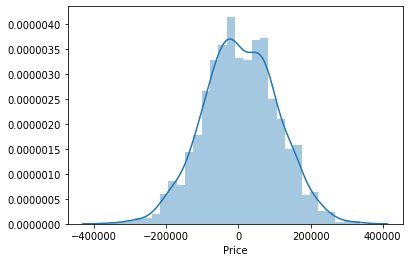

In [6]:
sns.distplot(predictions - y_test, bins=30)

In [7]:
print( lr.coef_)
print(lr.intercept_)

[2.14281889e+01 1.64857969e+05 1.20247960e+05 9.90182182e+02
 1.51744733e+01]
-2614108.5381366895


###### Ecommerce Customer data

In [8]:
EC = pd.read_csv('./project/Ecommerce Customers').drop(['Email', 'Address', 'Avatar'], axis=1)
EC.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
y = EC['Yearly Amount Spent']
x = EC.drop('Yearly Amount Spent', axis = 1)
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('MAE',mean_absolute_error(y_test, predictions))
print('MSE',mean_squared_error(y_test, predictions) )
print('R^2', r2_score(y_test, predictions))

MAE 7.751535864291059
MSE 100.78108577483009
R^2 0.9846852630889249


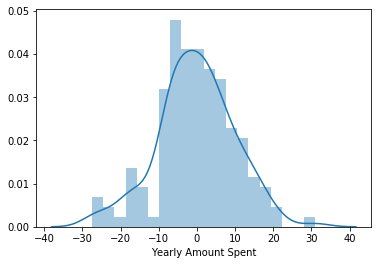

In [11]:
sns.distplot(y_test-predictions, bins=20)

In [12]:
print( lr.coef_)
print(lr.intercept_)

[25.50321015 38.3320056   0.38036492 61.73244049]
-1037.7900598450474


### Calssification - Logistic Regression
######  Titanic data

In [13]:
df = pd.read_csv('./project/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
"""
ages = []
for i in zip(df['Pclass'],df['Age']):
    age = i[1]
    pc = i[0]

    if str(age) == 'nan':
        if pc==1:
            ages.append(38)
        elif pc==2:
            ages.append(29)
        else:
            ages.append(25)
    else:
        ages.append(age)
        
df['Age'] = ages

"""

"\nages = []\nfor i in zip(df['Pclass'],df['Age']):\n    age = i[1]\n    pc = i[0]\n\n    if str(age) == 'nan':\n        if pc==1:\n            ages.append(38)\n        elif pc==2:\n            ages.append(29)\n        else:\n            ages.append(25)\n    else:\n        ages.append(age)\n        \ndf['Age'] = ages\n\n"

In [16]:
# 데이터 전처리하기
# Age의 null값을 'pcalss'의 평균나이로 채우기
Age_Pclass = dict(df.groupby('Pclass').Age.mean())
Age = []
for a,c in  df[['Age', 'Pclass']].values:
    if a>= 0:
        Age.append(a)
    else:
        Age.append(Age_Pclass[c])
Age
df['Age'] = Age
df
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [17]:
df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.00000,1,0,7.2500
1,1,1,female,38.00000,1,0,71.2833
2,1,3,female,26.00000,0,0,7.9250
3,1,1,female,35.00000,1,0,53.1000
4,0,3,male,35.00000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.00000,0,0,13.0000
887,1,1,female,19.00000,0,0,30.0000
888,0,3,female,25.14062,1,2,23.4500
889,1,1,male,26.00000,0,0,30.0000


In [18]:
df = pd.get_dummies(df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']], drop_first=True)
df.drop([])

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.00000,1,0,7.2500,1
1,1,1,38.00000,1,0,71.2833,0
2,1,3,26.00000,0,0,7.9250,0
3,1,1,35.00000,1,0,53.1000,0
4,0,3,35.00000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1
887,1,1,19.00000,0,0,30.0000,0
888,0,3,25.14062,1,2,23.4500,0
889,1,1,26.00000,0,0,30.0000,1


In [19]:
y = df.Survived
x = df.drop('Survived', axis=1)
x

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.00000,1,0,7.2500,1
1,1,38.00000,1,0,71.2833,0
2,3,26.00000,0,0,7.9250,0
3,1,35.00000,1,0,53.1000,0
4,3,35.00000,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.00000,0,0,13.0000,1
887,1,19.00000,0,0,30.0000,0
888,3,25.14062,1,2,23.4500,0
889,1,26.00000,0,0,30.0000,1


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print(report)


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       139
           1       0.81      0.73      0.77        84

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



###### Advertising Data

In [21]:
df = pd.read_csv('./project/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [22]:
df['hour'] = df.Timestamp.apply(lambda x: x[5:7])

In [23]:
df = pd.get_dummies(df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male', 'hour', 'Clicked on Ad']])
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07
0,68.95,35,61833.90,256.09,0,0,0,0,1,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,0,1,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,1,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,1,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,0,1,0


In [24]:
x = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad'] 
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07
0,68.95,35,61833.90,256.09,0,0,0,1,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,1,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,1,0,0,0,0
3,74.15,29,54806.18,245.89,1,1,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,0,1,0,0,0,0,0
996,51.30,45,67782.17,134.42,1,0,0,0,1,0,0,0
997,51.63,51,42415.72,120.37,1,0,1,0,0,0,0,0
998,55.55,19,41920.79,187.95,0,0,0,1,0,0,0,0


In [25]:
#timestamp에서 도출된 시간대 데이터를 포함하면 더 높은 f1을 얻을 수 있다
x_train, x_test, y_train, y_test = train_test_split(x, y)
lr = LogisticRegression()
lr.fit(x_train, y_train)

predictions = lr.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       126
           1       0.89      0.87      0.88       124

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



In [26]:
x = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad'] 
x
x_train, x_test, y_train, y_test = train_test_split(x, y)
lr = LogisticRegression()
lr.fit(x_train, y_train)

predictions = lr.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       137
           1       0.90      0.89      0.90       113

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



## Calssification - KNN
###### KNN project data

In [27]:
df = pd.read_csv('./project/KNN_Project_Data')
df.head(10)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
5,1587.993461,667.420121,2072.048544,364.624958,905.011385,2229.178514,880.442566,568.698408,645.719217,2156.949990,1
6,1497.293624,822.435853,908.059366,671.797517,1280.270442,1910.066313,1052.812386,713.757499,703.951632,1088.493788,0
7,1172.820769,1166.958461,455.656588,445.572745,1109.894585,1045.551452,1301.821786,264.940137,945.023932,2307.922229,0
8,839.494647,1089.747059,653.699894,659.334590,1529.725972,1521.320489,1401.676227,433.025043,1289.063583,1690.149835,0
9,1028.689140,202.089774,1030.841860,429.109102,943.104815,1978.506855,653.178512,753.655291,1336.375960,1057.864848,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [29]:
x = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']
x

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792
...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020


In [30]:
df['TARGET CLASS'].unique()

array([0, 1], dtype=int64)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       154
           1       0.77      0.81      0.79       146

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [32]:
# 최적의 K값.. 
acc = [KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train).score(x_test, y_test) for i in range(1,101)]
acc

[0.72,
 0.74,
 0.7866666666666666,
 0.7833333333333333,
 0.7966666666666666,
 0.7933333333333333,
 0.7833333333333333,
 0.8033333333333333,
 0.8,
 0.8066666666666666,
 0.81,
 0.8133333333333334,
 0.8233333333333334,
 0.82,
 0.8233333333333334,
 0.8366666666666667,
 0.8366666666666667,
 0.8433333333333334,
 0.83,
 0.8366666666666667,
 0.8266666666666667,
 0.8333333333333334,
 0.8166666666666667,
 0.82,
 0.83,
 0.8333333333333334,
 0.83,
 0.8366666666666667,
 0.8333333333333334,
 0.8466666666666667,
 0.8466666666666667,
 0.8366666666666667,
 0.8366666666666667,
 0.83,
 0.8366666666666667,
 0.8333333333333334,
 0.8266666666666667,
 0.8233333333333334,
 0.8166666666666667,
 0.8133333333333334,
 0.8233333333333334,
 0.81,
 0.8133333333333334,
 0.8066666666666666,
 0.8066666666666666,
 0.8133333333333334,
 0.8166666666666667,
 0.8166666666666667,
 0.8166666666666667,
 0.8233333333333334,
 0.83,
 0.83,
 0.8233333333333334,
 0.83,
 0.8266666666666667,
 0.82,
 0.8233333333333334,
 0.82666666666

In [33]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       154
           1       0.81      0.79      0.80       146

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [34]:
# Standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_train_std, x_test_std, y_train, y_test = train_test_split(x_std, y)

In [35]:
acc = [KNeighborsClassifier(n_neighbors = i).fit(x_train_std, y_train).score(x_test_std, y_test) for i in range(1,101)]
acc

[0.728,
 0.744,
 0.808,
 0.784,
 0.796,
 0.788,
 0.812,
 0.808,
 0.824,
 0.816,
 0.816,
 0.804,
 0.808,
 0.812,
 0.812,
 0.808,
 0.812,
 0.816,
 0.82,
 0.82,
 0.82,
 0.824,
 0.82,
 0.82,
 0.804,
 0.824,
 0.82,
 0.816,
 0.82,
 0.82,
 0.808,
 0.812,
 0.812,
 0.816,
 0.82,
 0.82,
 0.82,
 0.82,
 0.824,
 0.82,
 0.84,
 0.84,
 0.836,
 0.836,
 0.84,
 0.848,
 0.844,
 0.844,
 0.848,
 0.844,
 0.848,
 0.848,
 0.844,
 0.84,
 0.844,
 0.844,
 0.848,
 0.844,
 0.848,
 0.844,
 0.844,
 0.844,
 0.848,
 0.844,
 0.844,
 0.844,
 0.844,
 0.844,
 0.844,
 0.844,
 0.84,
 0.836,
 0.832,
 0.836,
 0.836,
 0.84,
 0.836,
 0.844,
 0.84,
 0.844,
 0.84,
 0.848,
 0.844,
 0.848,
 0.84,
 0.848,
 0.848,
 0.848,
 0.844,
 0.848,
 0.848,
 0.844,
 0.84,
 0.848,
 0.848,
 0.852,
 0.844,
 0.848,
 0.844,
 0.86]

In [36]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(x_train_std, y_train)
predictions = knn.predict(x_test_std)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       112
           1       0.83      0.84      0.84       138

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



######  classified data

In [37]:
df = pd.read_csv('./project/Classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [38]:
y = df['TARGET CLASS']
x = df.drop('TARGET CLASS', axis=1)
x

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167
...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [40]:
accs = [KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train).score(x_test, y_test) for i in range(1,101)]
accs

[0.91,
 0.92,
 0.9233333333333333,
 0.9333333333333333,
 0.9366666666666666,
 0.9366666666666666,
 0.9333333333333333,
 0.9433333333333334,
 0.94,
 0.9433333333333334,
 0.94,
 0.94,
 0.9366666666666666,
 0.9366666666666666,
 0.9333333333333333,
 0.9366666666666666,
 0.9333333333333333,
 0.93,
 0.9333333333333333,
 0.9366666666666666,
 0.9366666666666666,
 0.9433333333333334,
 0.94,
 0.9366666666666666,
 0.9333333333333333,
 0.94,
 0.9333333333333333,
 0.9366666666666666,
 0.93,
 0.9366666666666666,
 0.93,
 0.9333333333333333,
 0.93,
 0.93,
 0.93,
 0.93,
 0.9266666666666666,
 0.93,
 0.93,
 0.9333333333333333,
 0.93,
 0.9333333333333333,
 0.93,
 0.9333333333333333,
 0.93,
 0.9333333333333333,
 0.93,
 0.9366666666666666,
 0.9266666666666666,
 0.9366666666666666,
 0.9266666666666666,
 0.9266666666666666,
 0.9266666666666666,
 0.93,
 0.93,
 0.93,
 0.9266666666666666,
 0.93,
 0.9266666666666666,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.9266666666666666,
 0.9333333333333333,
 0.93,

In [41]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       141
           1       0.92      0.97      0.94       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



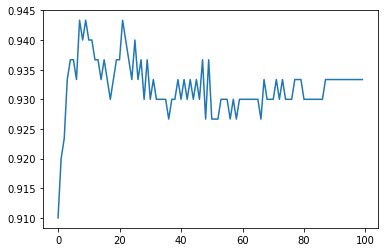

In [42]:
plt.plot(range(len(accs)), accs)

### classification-SVM
###### gamma: 한 점의 영향력 C: 이상치 허용 범위(과적합과 관련)
###### breast cancer

In [43]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
x= pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=['cancer'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
predictions = svc.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        63
           1       0.91      0.97      0.94       108

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
from sklearn.model_selection import GridSearchCV
params = {'C':[0.001,0.01,0.1,1,10,100,1000], 'gamma':[100,10,1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(), param_grid=params, refit=True, verbose=True )
grid.fit(x_train, y_train)
grid.best_params_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was

Fitting 5 folds for each of 49 candidates, totalling 245 fits


C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

{'C': 1, 'gamma': 0.0001}

In [45]:
predictions = grid.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        63
           1       0.94      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



###### iris data

In [46]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [47]:
y = iris.species
x = iris.drop('species', axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
params = {'C':[0.001,0.01,0.1,1,10], 'gamma':[0.01,0.1,1,10]}
grid = GridSearchCV(SVC(),param_grid=params, refit=True, verbose=True)
grid.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [49]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [50]:
predictions= grid.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.91      0.95        22
   virginica       0.82      1.00      0.90         9

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



### classification - Decision Tree
###### kyphosis data

In [51]:
df = pd.read_csv('./project/kyphosis.csv')
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [52]:
y = df.Kyphosis
x = df.drop('Kyphosis', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

      absent       0.75      1.00      0.86         9
     present       1.00      0.25      0.40         4

    accuracy                           0.77        13
   macro avg       0.88      0.62      0.63        13
weighted avg       0.83      0.77      0.72        13



In [53]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000)
forest.fit(x_train, y_train)
predictions = forest.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

      absent       0.69      1.00      0.82         9
     present       0.00      0.00      0.00         4

    accuracy                           0.69        13
   macro avg       0.35      0.50      0.41        13
weighted avg       0.48      0.69      0.57        13



C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### loan data

In [54]:
df = pd.read_csv('./project/loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [55]:
x = pd.get_dummies(df.drop('not.fully.paid', axis=1), drop_first=True)
y = df['not.fully.paid']
x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,1,0,0


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2432
           1       0.19      0.21      0.20       442

    accuracy                           0.75      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.75      0.75      2874



In [57]:
forest = RandomForestClassifier(n_estimators=1000 )
forest.fit(x_train, y_train)
predictions = forest.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2432
           1       0.36      0.02      0.03       442

    accuracy                           0.84      2874
   macro avg       0.61      0.51      0.47      2874
weighted avg       0.77      0.84      0.78      2874



In [58]:
#param = {'C':[0.001,0.01,0.1,1,10], 'gamma':[10,1,0.1,0.01,0.001]}
#grid = GridSearchCV(SVC(), param_grid=param,refit=True)
#grid.fit(x_train, y_train)
#grid.best_params_


In [59]:
#predictions =  grid.predict(x_test)
#report = classification_report(y_test, predictions)
#print(report)

### classifier - voting classifier
###### titanic data

In [60]:
x = np.load('./project/tatanic_x_train.npy')
y = np.load('./project/tatanic_y_train.npy')
x

array([[0.27345609, 0.01415106, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.473882  , 0.13913574, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32356257, 0.01546857, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.30873565, 0.04577135, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.32356257, 0.0585561 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39872228, 0.01512699, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

log = LogisticRegression()
tree = DecisionTreeClassifier()
gauss = GaussianNB()
hardvoter = VotingClassifier(
    estimators=[('lr', log), ('dt', tree), ('gnb', gauss)],
    voting= 'hard' # hard 다수결 soft 가중치 방식
)
softvoter = VotingClassifier(
    estimators=[('lr', log), ('dt', tree), ('gnb', gauss)],
    voting= 'soft' # hard 다수결 soft 가중치 방식
)

In [62]:
algos = [log, tree, gauss, hardvoter, softvoter]
accs = []
for al in algos:
    al.fit(x_train, y_train)
    preds = al.predict(x_test)
    acc = np.mean(y_test == preds)
    accs.append(acc)
accs

[0.8161434977578476,
 0.726457399103139,
 0.7174887892376681,
 0.8161434977578476,
 0.8116591928251121]

In [63]:
new_hardvoter = VotingClassifier(
    estimators=[('lr', log), ('dt', tree)],
    voting= 'hard' # hard 다수결 soft 가중치 방식
)
new_softvoter = VotingClassifier(
    estimators=[('lr', log), ('dt', tree)],
    voting= 'soft' # hard 다수결 soft 가중치 방식
)
algos = [log, tree, gauss, hardvoter, softvoter, new_hardvoter, new_softvoter]
accs = []
for al in algos:
    al.fit(x_train, y_train)
    preds = al.predict(x_test)
    acc = np.mean(y_test == preds)
    accs.append(acc)
accs

[0.8161434977578476,
 0.7399103139013453,
 0.7174887892376681,
 0.8116591928251121,
 0.8116591928251121,
 0.7892376681614349,
 0.7443946188340808]

In [70]:
### 앙상블모델의 최적화(grid search)
from sklearn.model_selection import GridSearchCV
opt_hardvoter = VotingClassifier(
    estimators=[('lr', log), ('dt', tree)],
    voting= 'hard' # hard 다수결 soft 가중치 방식
)


params = {
    'lr__C':[0.1,5.0,10.0], 
    'dt__criterion':['gini', 'entropy'] ,  
    'dt__max_depth':[4,3,2],
    'dt__min_samples_leaf':[2,3,4]
}
grid = GridSearchCV(
    estimator = opt_hardvoter,
    param_grid = params,
    cv = 5,
    refit = True,
    verbose = False
)
grid.fit(x_train, y_train)




GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                              

In [72]:
print( classification_report( y_test, grid.predict(x_test)) )

              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82       124
         1.0       0.86      0.60      0.70        99

    accuracy                           0.78       223
   macro avg       0.80      0.76      0.76       223
weighted avg       0.79      0.78      0.77       223



### Clustering K-means
###### blob data

In [73]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=2, centers= 4, cluster_std=1.8, random_state=101)
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

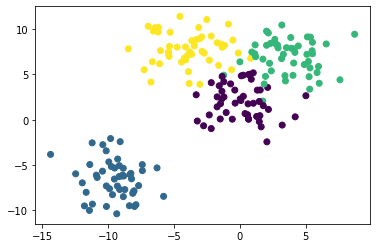

In [74]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1])

In [75]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)

In [76]:
y_pred = km.fit_predict(data[0])

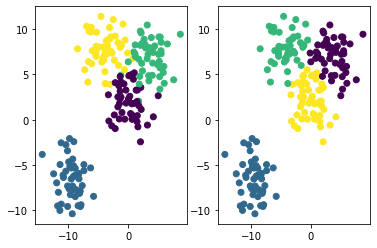

In [77]:
fig,(a1, a2) =plt.subplots(1,2)
a1.scatter(data[0][:,0], data[0][:,1], c=data[1])
a2.scatter(data[0][:,0], data[0][:,1], c=y_pred)

###### college data

In [78]:
df = pd.read_csv('./project/College_Data', index_col=0)
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [79]:
private = df.Private
df = df.drop('Private', axis=1)
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [80]:
km = KMeans(n_clusters=2)
group = km.fit_predict(df)

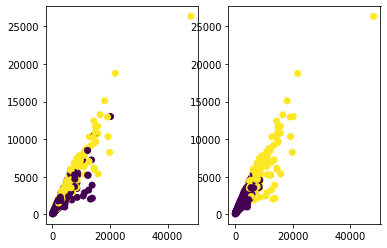

In [81]:
fig,(a1, a2) =plt.subplots(1,2)
a1.scatter(df.Apps, df.Accept, c=private.replace({'Yes':0, 'No':1}))
a2.scatter(df.Apps, df.Accept, c=group)

In [82]:
np.mean( group==private.replace({'Yes':0, 'No':1}) )

0.7786357786357786